# Simple Linear Regression

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [65]:
data = pd.read_csv(r"C:\Users\prash\OneDrive\Documents\CTC\Python Files\Python Rahul Sir New\student_scores.csv")

In [64]:
data = data[["Hours", "Scores"]]
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [12]:
data.shape

(25, 2)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [15]:
data.shape

(25, 2)

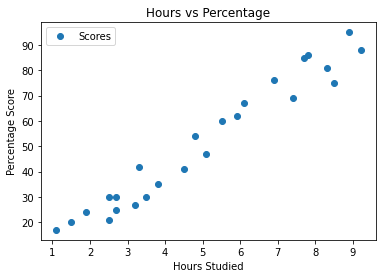

In [16]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [17]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [19]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [20]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

In [21]:
regressor.fit(X_train, y_train)

LinearRegression()

In [22]:
print(regressor.intercept_)

2.018160041434683


In [23]:
print(regressor.coef_)

[9.91065648]


In [24]:
y_pred = regressor.predict(X_test)

In [25]:
y_pred = np.round(y_pred, decimals=0)

In [26]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.0
1,27,34.0
2,69,75.0
3,30,27.0
4,62,60.0


In [27]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R Squared:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 4.2
Mean Squared Error: 21.4
Root Mean Squared Error: 4.626013402488151
R Squared: 0.9459923278820916


In [28]:
np.mean(data["Scores"])

51.48

In [29]:
np.mean(y_test)

41.6

In [30]:
np.mean(y_train)

53.95

#### You can see that the value of root mean squared error is 4.64, which is less than 10% of the mean value of the percentages of all the students i.e. 51.48. This means that our algorithm did a decent job.

# Multiple Linear Regression

In [32]:
data1 = pd.read_csv(r'C:\Users\prash\OneDrive\Documents\CTC\Python Files\Python Rahul Sir New\petrol consumption.csv')

In [33]:
data1.head()

,Index,Petrol tax (cents per gallon),Average income (dollars),Paved Highways (miles),Population_Driver_licence(%),Consumption of petrol (millions of gallons)
0,1,9.0,3571,1976,0.525,541
1,2,9.0,4092,1250,0.572,524
2,3,9.0,3865,1586,0.580,561
3,4,7.5,4870,2351,0.529,414
4,5,8.0,4399,431,0.544,410


In [34]:
data1.shape

(48, 6)

In [35]:
data1.describe()

,Index,Petrol tax (cents per gallon),Average income (dollars),Paved Highways (miles),Population_Driver_licence(%),Consumption of petrol (millions of gallons)
count,48.00,48.000000,48.000000,48.000000,48.000000,48.000000
mean,24.50,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,14.00,0.950770,573.623768,3491.507166,0.055470,111.885816
min,1.00,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,12.75,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,24.50,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,36.25,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,48.00,10.000000,5342.000000,17782.000000,0.724000,968.000000


In [36]:
data1.isnull().sum()

Index                                          0
Petrol tax (cents per gallon)                  0
Average income (dollars)                       0
Paved Highways (miles)                         0
Population_Driver_licence(%)                   0
Consumption of petrol (millions of gallons)    0
dtype: int64

<AxesSubplot:>

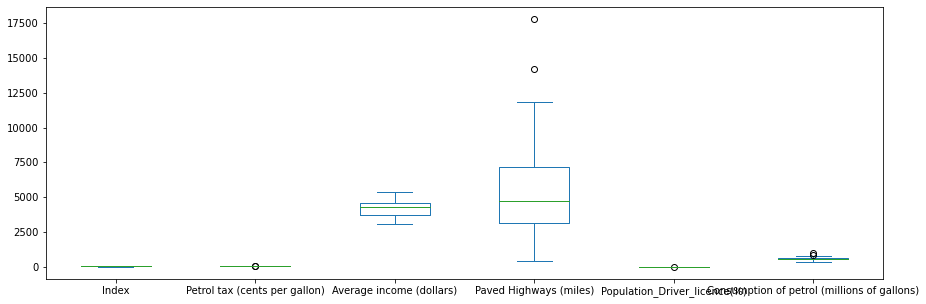

In [37]:
data1.plot(kind = 'box' , figsize = (15,5))

In [38]:
data1.corr()

,Index,Petrol tax (cents per gallon),Average income (dollars),Paved Highways (miles),Population_Driver_licence(%),Consumption of petrol (millions of gallons)
Index,1.000000,-0.385354,-0.288837,0.046491,0.281566,0.471123
Petrol tax (cents per gallon),-0.385354,1.000000,0.012665,-0.522130,-0.288037,-0.451280
Average income (dollars),-0.288837,0.012665,1.000000,0.050163,0.157070,-0.244862
Paved Highways (miles),0.046491,-0.522130,0.050163,1.000000,-0.064129,0.019042
Population_Driver_licence(%),0.281566,-0.288037,0.157070,-0.064129,1.000000,0.698965
Consumption of petrol (millions of gallons),0.471123,-0.451280,-0.244862,0.019042,0.698965,1.000000


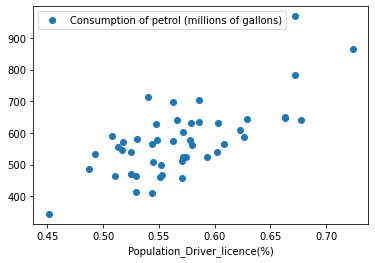

In [39]:
data1.plot(x="Population_Driver_licence(%)", y="Consumption of petrol (millions of gallons)", style='o')
plt.show()

In [66]:
data1[["Population_Driver_licence(%)"]].describe()

,Population_Driver_licence(%)
count,48.000000
mean,0.570333
std,0.055470
min,0.451000
25%,0.529750
50%,0.564500
75%,0.595250
max,0.724000


In [41]:
q3 = 0.595250
q1 = 0.529750

In [42]:
IQR_ol = q3 - q1

In [43]:
val = q3 + (1.5 * IQR_ol) #q1-(1.5*IQR)
val

0.6934999999999998

In [44]:
dummy_olfree = []
for i in data1["Population_Driver_licence(%)"]:
    if i<0.69:
        dummy_olfree.append(i)
    else:
        dummy_olfree.append(0.69)

In [45]:
data1["Population_Driver_licence(%)_olfree"] = dummy_olfree

<AxesSubplot:>

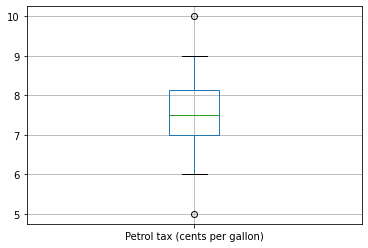

In [46]:
data1[["Petrol tax (cents per gallon)"]].boxplot() 

In [47]:
data1[["Petrol tax (cents per gallon)"]].describe()

,Petrol tax (cents per gallon)
count,48.000000
mean,7.668333
std,0.950770
min,5.000000
25%,7.000000
50%,7.500000
75%,8.125000
max,10.000000


In [48]:
q3 = 8.125
q1 = 7.000
IQR = q3-q1

In [49]:
UOL = q3 + (1.5 * IQR) #q1-(1.5*IQR)
LOL = q1 - (1.5 * IQR)
print(UOL)
print(LOL)

9.8125
5.3125


In [50]:
dummy_olfree1 = []
for i in data1["Petrol tax (cents per gallon)"]:
    if i<5.3125:
        dummy_olfree1.append(5.3125)
    elif i>9.8125:
        dummy_olfree1.append(9.8125)
    else:
        dummy_olfree1.append(i)

In [51]:
data1["Petrol tax dummy olfree"] = dummy_olfree1

<AxesSubplot:>

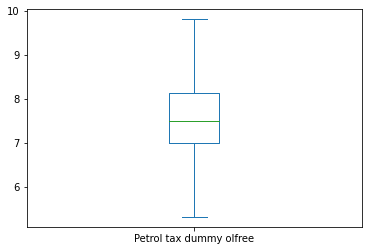

In [52]:
data1[['Petrol tax dummy olfree']].plot(kind = 'box')

In [53]:
X = data1[['Average income (dollars)','Paved Highways (miles)','Petrol tax dummy olfree','Population_Driver_licence(%)_olfree']]
y = data1['Consumption of petrol (millions of gallons)']

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

In [55]:
vif_data

,feature,VIF
0,Average income (dollars),56.419106
1,Paved Highways (miles),3.848405
2,Petrol tax dummy olfree,44.373670
3,Population_Driver_licence(%)_olfree,59.541922


In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [57]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(normalize=True)
regressor.fit(X_train, y_train)

C:\Users\prash\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [58]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Average income (dollars),-0.064812
Paved Highways (miles),-0.004592
Petrol tax dummy olfree,-41.680950
Population_Driver_licence(%)_olfree,1355.272732


#### This means that for a unit increase in "petrol_tax", there is a decrease of 40.01 million gallons in gas consumption. Similarly, a unit increase in proportion of population with a drivers license results in an increase of 1.341 billion gallons of gas consumption. We can see that "Average_income" and "Paved_Highways" have a very little effect on the gas consumption.

In [59]:
y_pred = regressor.predict(X_test)
y_pred = np.round(y_pred)

In [60]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
29,534,467.0
4,410,545.0
26,577,589.0
30,571,571.0
32,577,650.0
37,704,649.0
34,487,510.0
40,587,675.0
7,467,502.0
10,580,501.0


In [61]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R squared value :', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 56.7
Mean Squared Error: 4695.1
Root Mean Squared Error: 68.52079976182415
R squared value : 0.1987118222901847


#### You can see that the value of root mean squared error is 68.31, which is slightly greater than 10% of the mean value of the gas consumption in all states (57.6). This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [62]:
np.mean(data1["Consumption of petrol (millions of gallons)"])*10/100

57.67708333333334